In [153]:
import pandas as pd
import numpy as np
import env
import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score

In [2]:
df = wrangle.get_zillow_data()

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [230]:
df.head()
2021-1020

1001

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38598 entries, 0 to 38597
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   38598 non-null  float64
 1   bedroomcnt                    38598 non-null  float64
 2   calculatedfinishedsquarefeet  38500 non-null  float64
 3   propertylandusetypeid         38598 non-null  float64
 4   taxvaluedollarcnt             38597 non-null  float64
dtypes: float64(5)
memory usage: 1.5 MB


In [7]:
df.propertylandusetypeid.value_counts(dropna=False)

261.0    28124
266.0    10211
265.0      186
275.0       40
263.0       34
264.0        3
Name: propertylandusetypeid, dtype: int64

In [6]:
df.duplicated().sum()

204

In [8]:
## drop dups
# check for duplicates 
num_dups = df.duplicated().sum()
    # if we found duplicate rows, we will remove them, log accordingly and proceed
if num_dups > 0:
    print(f'There are {num_dups} duplicate rows in your dataset - these will be dropped.')

    print ('----------------')
        # remove duplicates if found
    df = df.drop_duplicates()
else:
        # otherwise, we log that there are no dupes, and proceed with our process
    print(f'There are no duplicate rows in your dataset.')

    print('----------------')

There are 204 duplicate rows in your dataset - these will be dropped.
----------------


In [8]:
df.duplicated().sum()

0

In [17]:
null_rows = df.isnull().any(axis=1).sum()
print(f'There are {null_rows} null rows in the dataframe')

There are 0 null rows in the dataframe


> removing null values because in each instance the number of bedrooms and bathrooms is 0 and the tax value dollar count is high enough and the property land use type shows they are either single family, mobile homes or condo which are unlikely to not have a bathroom 

In [10]:
# drop null values
df = df.dropna()
# df = df.dropna(subset=['calculatedfinishedsquarefeet', 'taxvaluedollarcnt'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38295 entries, 0 to 38597
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   38295 non-null  float64
 1   bedroomcnt                    38295 non-null  float64
 2   calculatedfinishedsquarefeet  38295 non-null  float64
 3   propertylandusetypeid         38295 non-null  float64
 4   taxvaluedollarcnt             38295 non-null  float64
dtypes: float64(5)
memory usage: 1.8 MB


In [12]:
train, validate, test = wrangle.split_zillow(df)

In [14]:
train.shape, validate.shape, test.shape

((21445, 5), (9191, 5), (7659, 5))

In [15]:
train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,propertylandusetypeid,taxvaluedollarcnt
16776,3.0,2.0,1251.0,266.0,320500.0
35992,2.0,3.0,1037.0,261.0,377000.0
22582,2.0,3.0,1141.0,261.0,488000.0
15855,2.5,5.0,3383.0,261.0,1114729.0
35179,2.0,3.0,1435.0,261.0,583364.0


In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21445 entries, 16776 to 23951
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   21445 non-null  float64
 1   bedroomcnt                    21445 non-null  float64
 2   calculatedfinishedsquarefeet  21445 non-null  float64
 3   propertylandusetypeid         21445 non-null  float64
 4   taxvaluedollarcnt             21445 non-null  float64
dtypes: float64(5)
memory usage: 1.6 MB


## Exploration exercises

In [20]:
df.bathroomcnt.nunique()

20

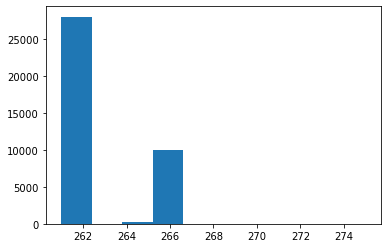

In [26]:
df.propertylandusetypeid.hist()
plt.grid(False)
plt.show()

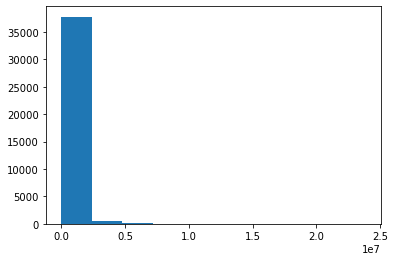

In [25]:
df.taxvaluedollarcnt.hist()
plt.grid(False)
plt.show()

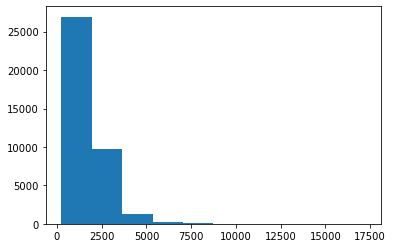

In [23]:
df.calculatedfinishedsquarefeet.hist()
plt.grid(False)
plt.show()

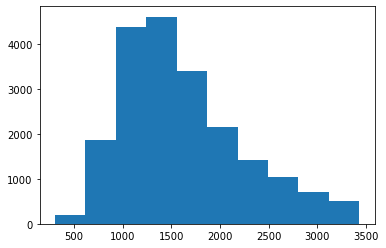

In [129]:
new_df.calculatedfinishedsquarefeet.hist()
plt.grid(False)
plt.show()

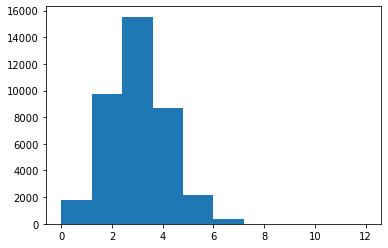

In [22]:
df.bedroomcnt.hist()
plt.grid(False)
plt.show()

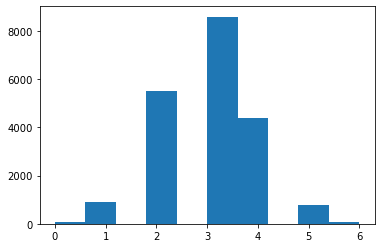

In [128]:
new_df.bedroomcnt.hist()
plt.grid(False)
plt.show()

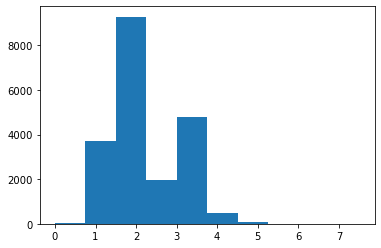

In [127]:
new_df.bathroomcnt.hist()
plt.grid(False)
plt.show()

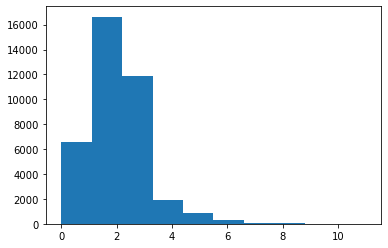

In [18]:
df.bathroomcnt.hist()
plt.grid(False)
plt.show()

In [130]:
new_df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,propertylandusetypeid,taxvaluedollarcnt
16776,3.0,2.0,1251.0,266.0,320500.0
35992,2.0,3.0,1037.0,261.0,377000.0
22582,2.0,3.0,1141.0,261.0,488000.0
15855,2.5,5.0,3383.0,261.0,1114729.0
35179,2.0,3.0,1435.0,261.0,583364.0


In [120]:
def plot_categorical_and_continuous_vars(df, cat_vars, cont_vars):
    for cat in cat_vars:
        for cont in cont_vars:
            # creates a boxplot
            sns.boxplot(x=cat, y=cont, data=df)
            plt.title('Distribution of ' + cont)
            plt.show()
            
            # creates a swarmplot
            sns.swarmplot(x=cat, y=cont, data=df)
            plt.show()
    
            # creates a stripplot
            sns.stripplot(x=cat, y=cont, data=df)
            plt.show()
            plt.tight_layout()

In [131]:
new_df.corr()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,propertylandusetypeid,taxvaluedollarcnt
bathroomcnt,1.000000,0.524462,0.725495,0.009508,0.364915
bedroomcnt,0.524462,1.000000,0.669354,-0.474454,0.180654
calculatedfinishedsquarefeet,0.725495,0.669354,1.000000,-0.317840,0.448616
propertylandusetypeid,0.009508,-0.474454,-0.317840,1.000000,-0.063778
taxvaluedollarcnt,0.364915,0.180654,0.448616,-0.063778,1.000000


In [27]:
def plot_variable_pairs(df):
    cols = df.columns.to_list()
    # show pairwise relationships
    sns.pairplot(df[cols], corner=True, kind="reg", plot_kws={'line_kws':{'color':'red'}})
    plt.show()

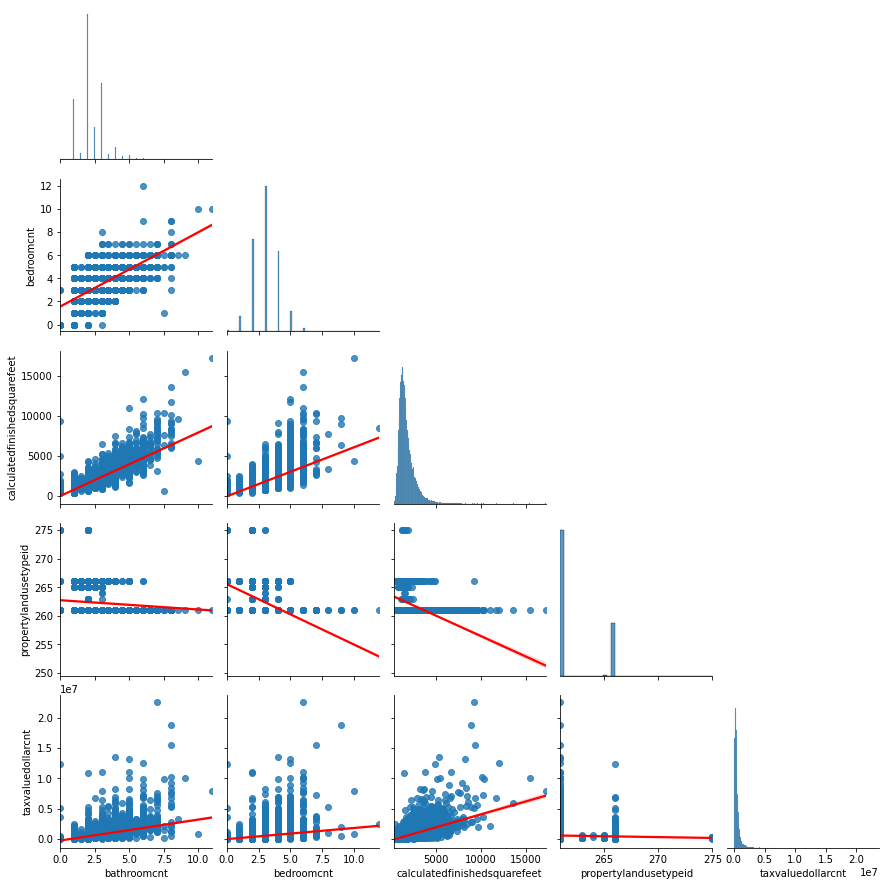

In [28]:
plot_variable_pairs(train)

In [32]:
train.columns

Index(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'propertylandusetypeid', 'taxvaluedollarcnt'],
      dtype='object')

In [29]:
tv_corr = train.corr()
tv_corr

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,propertylandusetypeid,taxvaluedollarcnt
bathroomcnt,1.000000,0.600829,0.808454,-0.068581,0.507985
bedroomcnt,0.600829,1.000000,0.666377,-0.475874,0.287717
calculatedfinishedsquarefeet,0.808454,0.666377,1.000000,-0.296616,0.617231
propertylandusetypeid,-0.068581,-0.475874,-0.296616,1.000000,-0.098956
taxvaluedollarcnt,0.507985,0.287717,0.617231,-0.098956,1.000000


<AxesSubplot:>

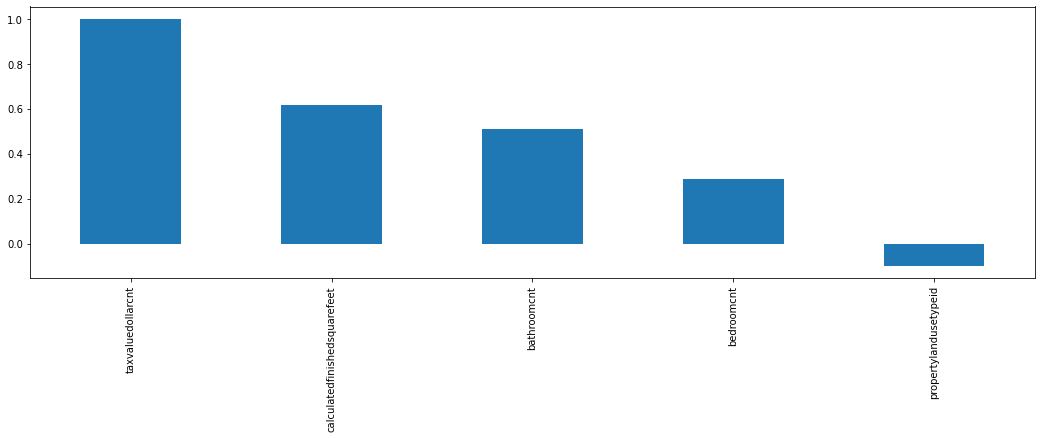

In [30]:
# check correlation of features with the target variable
train.corr().taxvaluedollarcnt.sort_values(ascending=False).plot(kind='bar', figsize=(18,5))

### features to include:
- bathroomcnt
- bedroomcnt
- calculatedfinishedsquarefeet
- taxamount
- yearbuilt

In [23]:
train = train.dropna(axis = 0)

In [31]:
def select_kbest(X, y, k):
    '''
    This function takes in the predictors (X), the target variable (y) and the number of features to select (k) and
    returns the names of the top k selected features based on the SelectKBest class.
    '''
    f_selector = SelectKBest(f_regression, k)
    f_selector.fit(X_train, y_train)
    mask = f_selector.get_support()    
    f_feature = X_train.columns[mask]
    return f_feature

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21445 entries, 16776 to 23951
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   21445 non-null  float64
 1   bedroomcnt                    21445 non-null  float64
 2   calculatedfinishedsquarefeet  21445 non-null  float64
 3   propertylandusetypeid         21445 non-null  float64
 4   taxvaluedollarcnt             21445 non-null  float64
dtypes: float64(5)
memory usage: 1.6 MB


In [54]:
X_train = train.drop(columns = ['taxvaluedollarcnt'])
y_train = train[['taxvaluedollarcnt']]

In [59]:
# using skbest function 
select_kbest(X_train, y_train, 3)

Index(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet'], dtype='object')

In [56]:
def rfe(X, y, n):
    '''
    This function takes in the predictors (X), the target variable (y) and the number of features to select (n) and
    returns the names of the top k selected features based on the Recursive Feature Engineering class.
    '''
    lm = LinearRegression()
    rfe = RFE(lm, n)
    rfe.fit(X, y)
    feat_selected = X.columns[rfe.support_]
    return feat_selected

In [60]:
rfe(X_train, y_train, 3)

Index(['bathroomcnt', 'bedroomcnt', 'propertylandusetypeid'], dtype='object')

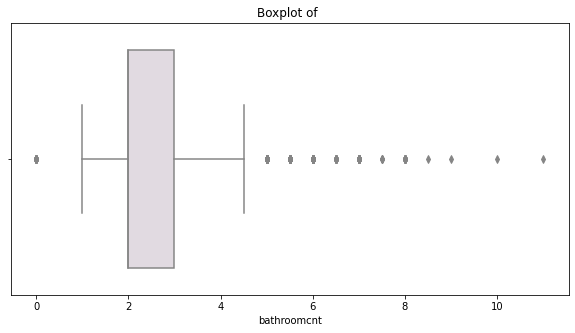

In [40]:
plt.figure(figsize=(10,5))
sns.boxplot(x='bathroomcnt', data=train,  palette="twilight_shifted")
plt.title('Boxplot of ')
plt.show()


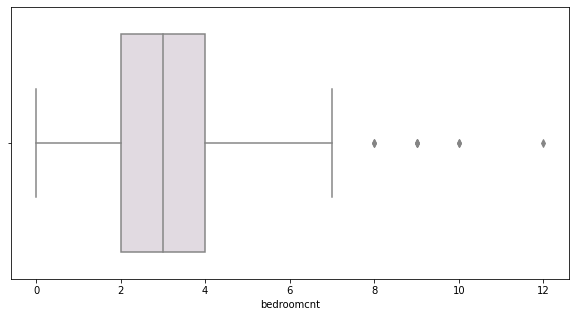

In [41]:
plt.figure(figsize=(10,5))
sns.boxplot(x='bedroomcnt', data=train,  palette="twilight_shifted")
# plt.title('Boxplot of ')
plt.show()


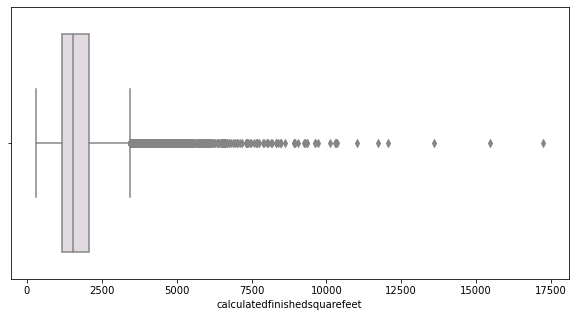

In [42]:
plt.figure(figsize=(10,5))
sns.boxplot(x='calculatedfinishedsquarefeet', data=train,  palette="twilight_shifted")
# plt.title('Boxplot of ')
plt.show()


In [95]:
xy = df[(df.bathroomcnt < 4.5) & (df.bathroomcnt > 0.5)]
xy.head()


,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,propertylandusetypeid,taxvaluedollarcnt
0,2.0,3.0,1125.0,266.0,289445.0
1,2.0,3.0,1316.0,261.0,205123.0
2,2.0,3.0,1458.0,261.0,136104.0
3,2.0,3.0,1766.0,266.0,810694.0
4,1.0,2.0,1421.0,261.0,35606.0


In [107]:
outlier_cols = ['bedroomcnt', 'calculatedfinishedsquarefeet']
def get_outliers(df, cols, k):
    for col in cols:
        q1, q3 = df[col].quantile([.25, .75])
        iqr = q3 - q1
        upper_bound = q3 + k * iqr
        lower_bound = q1 - k * iqr
        df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]
       
    return df

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38295 entries, 0 to 38597
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   38295 non-null  float64
 1   bedroomcnt                    38295 non-null  float64
 2   calculatedfinishedsquarefeet  38295 non-null  float64
 3   propertylandusetypeid         38295 non-null  float64
 4   taxvaluedollarcnt             38295 non-null  float64
dtypes: float64(5)
memory usage: 1.8 MB


In [ ]:
new_df = get_outliers(train, outlier_cols, 1.5)
new_df.info()

In [109]:
new_df

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,propertylandusetypeid,taxvaluedollarcnt
16776,3.0,2.0,1251.0,266.0,320500.0
35992,2.0,3.0,1037.0,261.0,377000.0
22582,2.0,3.0,1141.0,261.0,488000.0
15855,2.5,5.0,3383.0,261.0,1114729.0
35179,2.0,3.0,1435.0,261.0,583364.0


In [231]:
# get_outliers(train.bedroomcnt, 1.5)

In [64]:
get_outliers(train.calculatedfinishedsquarefeet, 3.0)

(4798.0, -1544.0)

In [117]:
def Min_Max_scaler(X_train, X_validate, X_test):
    '''
    Takes in 3 pandas dataframes of X_train, X_validate and X_test. Then returns the 
    scaler object as well as the transformed dfs
    
    This function assumes the independent variables being fed in as arguments
    are all continuous features
    '''
    scaler = MinMaxScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index,
                                 columns=X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index=X_validate.index,
                                 columns=X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index,
                                 columns=X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled


In [186]:
new_df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,propertylandusetypeid,taxvaluedollarcnt
16776,3.0,2.0,1251.0,266.0,320500.0
35992,2.0,3.0,1037.0,261.0,377000.0
22582,2.0,3.0,1141.0,261.0,488000.0
15855,2.5,5.0,3383.0,261.0,1114729.0
35179,2.0,3.0,1435.0,261.0,583364.0


In [187]:
X_train = new_df[['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet']]
X_validate = validate[['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet']]
X_test = test[['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet']]
y_train = new_df[['taxvaluedollarcnt']]

In [118]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = Min_Max_scaler(X_train, X_validate, X_test)

In [119]:
X_train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet
16776,0.400000,0.333333,0.302943
35992,0.266667,0.500000,0.234485
22582,0.266667,0.500000,0.267754
15855,0.333333,0.833333,0.984965
35179,0.266667,0.500000,0.361804


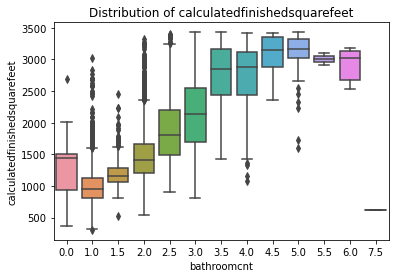

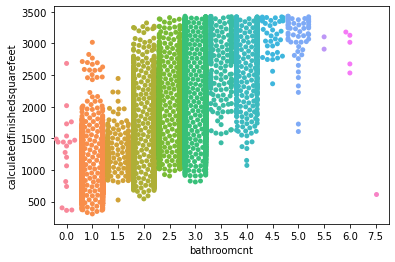

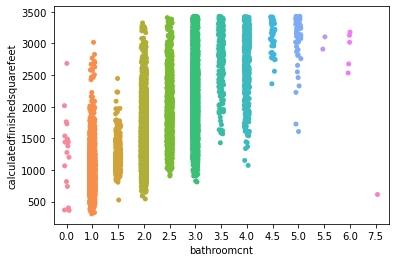

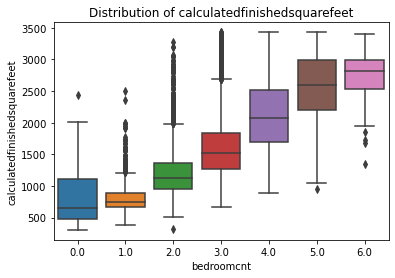

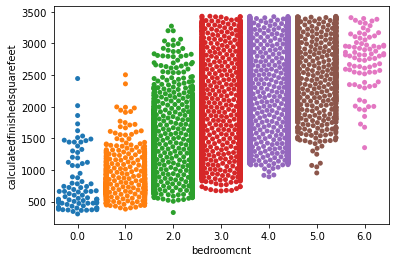

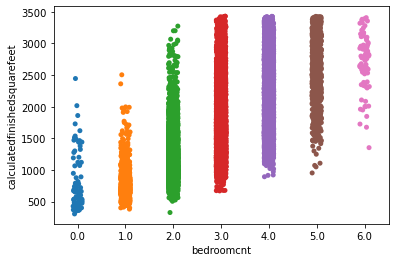

<Figure size 432x288 with 0 Axes>

In [126]:
cat_vars = ['bathroomcnt', 'bedroomcnt']
cont_vars = ['calculatedfinishedsquarefeet']

plot_categorical_and_continuous_vars(X_train, cat_vars, cont_vars)

### hypothesis testing 


1. tax value of homes with more than 3 bathrooms > overall mean tax value (t test)
2. is there a correlation between number of bedrooms and tax value dollar (pearson correlation test)

In [139]:
new_df.bathroomcnt.value_counts()

2.0    8862
3.0    4556
1.0    3706
2.5    1984
4.0     488
1.5     420
3.5     213
5.0      53
4.5      38
0.0      19
6.0       5
5.5       2
7.5       1
Name: bathroomcnt, dtype: int64

In [143]:
mean_tax_val = new_df.taxvaluedollarcnt.mean()
morethan3bath_mean = new_df[new_df.bathroomcnt > 3].taxvaluedollarcnt

In [144]:

alpha = 0.01

t, p = stats.ttest_1samp(morethan3bath_mean, mean_tax_val)

t, p/2, alpha

(20.525657944441267, 7.999592033326734e-76, 0.01)

In [149]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis. \nWe move forward with the alternative hypothesis:  The tax value for homes with more than 3 bathrooms is higher than the mean tax value")
else:
    print("We fail to reject the null hypothesis.")

We reject the null hypothesis. 
We move forward with the alternative hypothesis:  The tax value for homes with more than 3 bathrooms is higher than the mean tax value


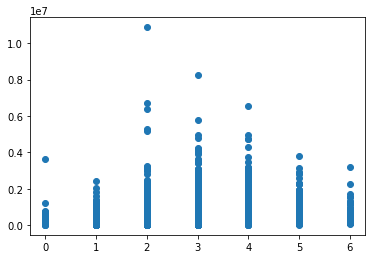

In [150]:
## testing hyp 2

# visualize the distribution
x = new_df.bedroomcnt
y = new_df.taxvaluedollarcnt
plt.scatter(x,y)

In [151]:
# this test returns the pearson's correlation r and a p -value
r, p = stats.pearsonr(new_df.bedroomcnt, new_df.taxvaluedollarcnt)
r, p, alpha

(0.18065404271667154, 8.021133418803077e-149, 0.01)

In [152]:
if p < alpha:
    print('''Our p value is less than alpha and we can reject the null hypothesis.
We can suggest there is a linear correlation between bedroomcnt and taxvalue''')
else:
    print('We cannot reject the null hypothesis')

Our p value is less than alpha and we can reject the null hypothesis.
We can suggest there is a linear correlation between bedroomcnt and taxvalue


# modeling

<AxesSubplot:>

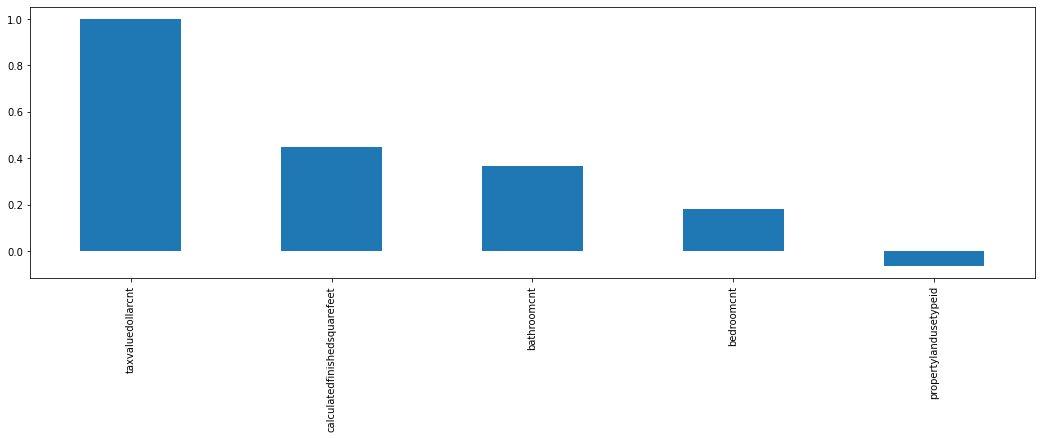

In [157]:
new_df.corr().taxvaluedollarcnt.sort_values(ascending=False).plot(kind='bar', figsize=(18,5))

In [161]:
y_validate = validate[['taxvaluedollarcnt']]

In [165]:
# 1. Predict tax value_pred_mean
tv_pred_mean = y_train.taxvaluedollarcnt.mean()
y_train['taxvaluedollarcnt_pred_mean'] = tv_pred_mean
y_validate['taxvaluedollarcnt_pred_mean'] = tv_pred_mean

# 2. Predict tax value_pred_median
tv_pred_median = y_train.taxvaluedollarcnt.median()
y_train['taxvaluedollarcnt_pred_median'] = tv_pred_median
y_validate['taxvaluedollarcnt_pred_median'] = tv_pred_median

In [166]:
y_validate.head()

,taxvaluedollarcnt,taxvaluedollarcnt_pred_mean,taxvaluedollarcnt_pred_median
4774,142966.0,498331.865936,363101.0
32771,1102842.0,498331.865936,363101.0
12668,505786.0,498331.865936,363101.0
19915,711750.0,498331.865936,363101.0
20141,98999.0,498331.865936,363101.0


In [167]:
# # 3. RMSE of wage_pred_mean
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_mean) ** 0.5
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_mean) ** 0.5

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))


# # 4. RMSE of wage_pred_median
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_median) ** .5
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_median) ** .5
print('-----------')
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  644641.35 
Validate/Out-of-Sample:  575171.89
-----------
RMSE using Median
Train/In-Sample:  658672.8 
Validate/Out-of-Sample:  589214.09


In [169]:
658672.8 - 589214.09

69458.71000000008

In [168]:
644641.35 - 575171.89

69469.45999999996

## Since the median has a smaller drop between rmse on train and validate we will go with median

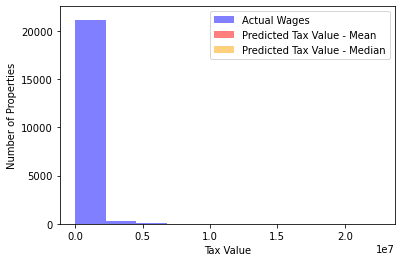

In [171]:
# plot to visualize actual vs predicted
plt.hist(y_train.taxvaluedollarcnt, color='blue', alpha=.5, label="Actual Wages")
plt.hist(y_train.taxvaluedollarcnt_pred_mean,  color='red', alpha=.5, rwidth=100, label="Predicted Tax Value - Mean")
plt.hist(y_train.taxvaluedollarcnt_pred_median,  color='orange', alpha=.5, rwidth=100, label="Predicted Tax Value - Median")
plt.xlabel("Tax Value")
plt.ylabel("Number of Properties")
plt.legend()
plt.show()

In [172]:
metric_df = pd.DataFrame(data=[{
    'model': 'median_baseline',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_mean)}])

In [173]:
metric_df

,model,rmse_validate,r^2_validate
0,median_baseline,589214.090518,-2.220446e-16


### Create regression models

- OLS
- Lasso + Lars
- GLM tweedie
- Polynomial

In [190]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20347 entries, 16776 to 23951
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   20347 non-null  float64
 1   bedroomcnt                    20347 non-null  float64
 2   calculatedfinishedsquarefeet  20347 non-null  float64
dtypes: float64(3)
memory usage: 1.2 MB


In [181]:
y_train.shape

(21445, 3)

In [193]:
# create the model object
# 
# make the thing
# 
lm = LinearRegression()

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
# 
# fit the thing
# 
lm.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
# 
# use the thing!
# 
y_train['taxvaluedollarcnt_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm) ** (1/2)
# predict validate
y_validate['taxvaluedollarcnt_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for OLS using LinearRegression
Training/In-Sample:  334727.7896306714 
Validation/Out-of-Sample:  453622.2578105051


In [195]:
metric_df = metric_df.append(
    {
    'model': 'OLS lm 1',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm)}, ignore_index=True)

In [196]:
metric_df

,model,rmse_validate,r^2_validate
0,median_baseline,589214.090518,-2.220446e-16
1,OLS lm 1,453622.257811,3.786725e-01


## lasso lars 

In [197]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!
lars.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lars) ** 0.5

# predict validate
y_validate['taxvaluedollarcnt_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lars) ** 0.5

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  334727.98339028965 
Validation/Out-of-Sample:  453695.40511006396


In [199]:
metric_df = metric_df.append(
    {
    'model': 'LassoLars alpha 1',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lars)}, ignore_index=True)

In [200]:
metric_df

,model,rmse_validate,r^2_validate
0,median_baseline,589214.090518,-2.220446e-16
1,OLS lm 1,453622.257811,3.786725e-01
2,LassoLars alpha 1,453695.405110,3.784782e-01


## TweedieRegressor (GLM)

In [201]:
# create the model object
glm = TweedieRegressor(power=0, alpha=1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 

glm.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_glm) ** 0.5


# predict validate
y_validate['taxvaluedollarcnt_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_glm) ** 0.5


print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  337988.8810949633 
Validation/Out-of-Sample:  461770.0080757756


In [202]:
metric_df = metric_df.append(
    {
    'model': 'Tweedie GLM Model power 1',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_glm)}, ignore_index=True)

In [203]:
metric_df

,model,rmse_validate,r^2_validate
0,median_baseline,589214.090518,-2.220446e-16
1,OLS lm 1,453622.257811,3.786725e-01
2,LassoLars alpha 1,453695.405110,3.784782e-01
3,Tweedie GLM Model power 1,461770.008076,3.565335e-01


## Polynomial Regression 

In [204]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

In [206]:
 #create the model object
# 
# make the thing
# 
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
# 
# fit the thing
# 
lm2.fit(X_train_degree2, y_train.taxvaluedollarcnt)

LinearRegression(normalize=True)

In [207]:
# predict train
# 
# use the thing!
# 
y_train['taxvaluedollarcnt_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm2) ** (1/2)
# predict validate
y_validate['taxvaluedollarcnt_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm2) ** (1/2)

print("RMSE for PolynomialRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for PolynomialRegression
Training/In-Sample:  330492.4164579974 
Validation/Out-of-Sample:  445947.06957600726


In [208]:
metric_df = metric_df.append(
    {
    'model': 'PolyReg Model',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm2)}, ignore_index=True)

In [209]:
metric_df

,model,rmse_validate,r^2_validate
0,median_baseline,589214.090518,-2.220446e-16
1,OLS lm 1,453622.257811,3.786725e-01
2,LassoLars alpha 1,453695.405110,3.784782e-01
3,Tweedie GLM Model power 1,461770.008076,3.565335e-01
4,PolyReg Model,445947.069576,3.992894e-01


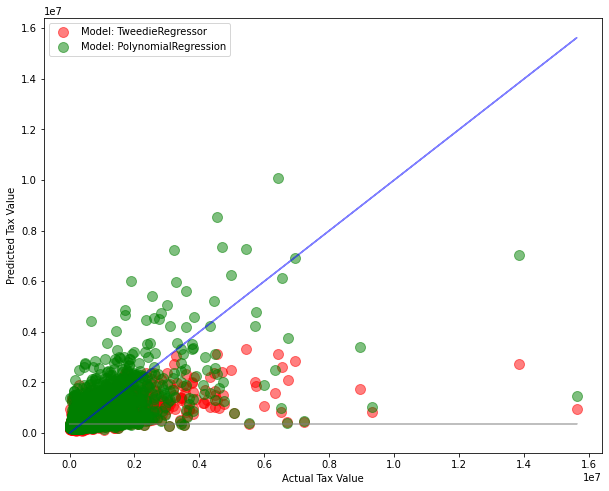

In [232]:
# y_validate.head()
plt.figure(figsize=(10,8))
plt.plot(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_median, alpha=.5, color="gray", label='_nolegend_')
# plt.annotate("Baseline: Predicted Using Mean", (37, 21.5))
plt.plot(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt, alpha=.5, color="blue", label='_nolegend_')
# plt.annotate("The Ideal Line: Predicted = Actual", (9, 11), rotation=24.5)

plt.scatter(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_glm, 
            alpha=.5, color="red", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm2, 
            alpha=.5, color="green", s=100, label="Model: PolynomialRegression")
plt.legend()
plt.ylim()
plt.xlabel("Actual Tax Value")
plt.ylabel("Predicted Tax Value")

plt.show()

>The Polynomial Regression Model is our best performing model with the lowest rmse and highest R squared

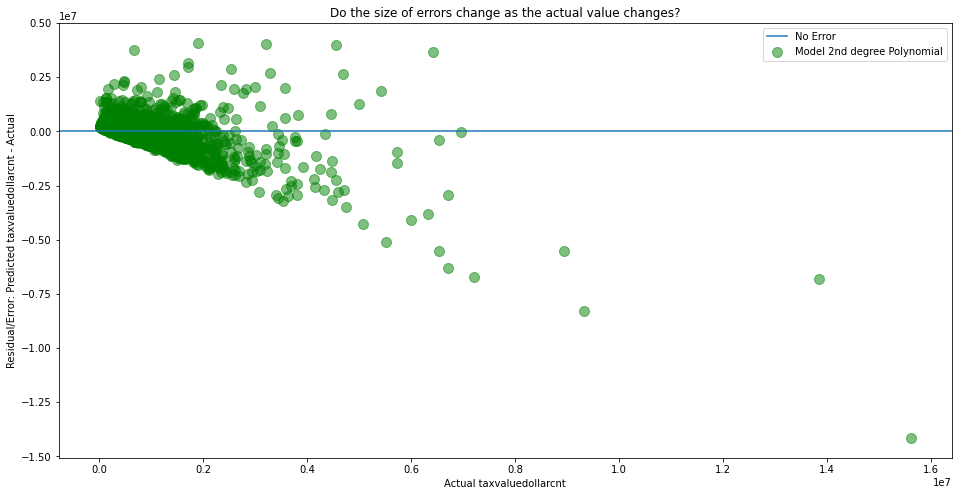

In [217]:
## residual plot

# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
# plt.scatter(y_validate.taxvaluedollarcnt, y_validate.wage_pred_lm - y_validate.wage, 
#             alpha=.5, color="red", s=100, label="Model: LinearRegression")
# plt.scatter(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_glm - y_validate.taxvaluedollarcnt, 
#             alpha=.8, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm2 - y_validate.taxvaluedollarcnt, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual taxvaluedollarcnt")
plt.ylabel("Residual/Error: Predicted taxvaluedollarcnt - Actual")
plt.title("Do the size of errors change as the actual value changes?")

plt.show()

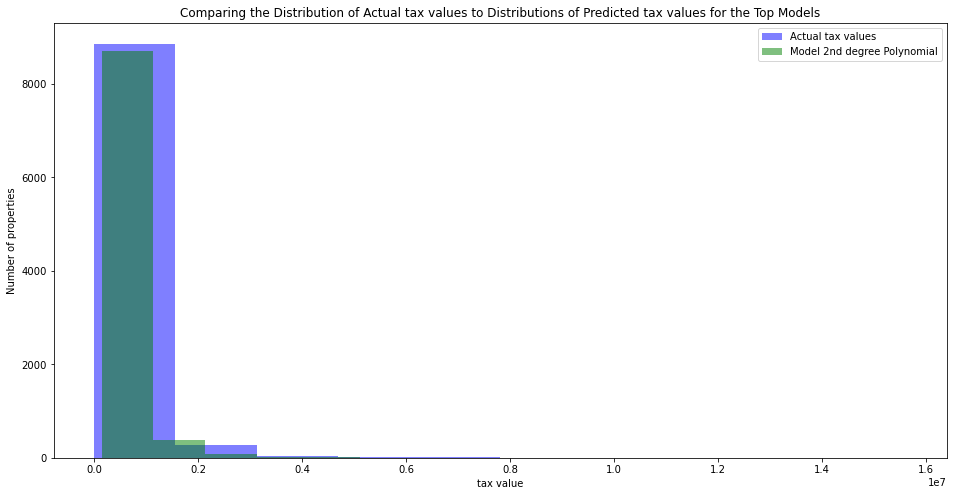

In [220]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.taxvaluedollarcnt, color='blue', alpha=.5, label="Actual tax values")
# plt.hist(y_validate.wage_pred_glm, color='red', alpha=.4, label="Model: TweedieRegressor")
plt.hist(y_validate.taxvaluedollarcnt_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("tax value")
plt.ylabel("Number of properties")
plt.title("Comparing the Distribution of Actual tax values to Distributions of Predicted tax values for the Top Models")
plt.legend()
plt.show()

In [222]:
y_test = test[['taxvaluedollarcnt']]

In [223]:
# predict on test
y_test['taxvaluedollarcnt_pred_lm2'] = lm2.predict(X_test_degree2)

In [224]:
# evaluate: rmse
rmse_test = mean_squared_error(y_test.taxvaluedollarcnt, y_test.taxvaluedollarcnt_pred_lm2) ** 0.5
print("RMSE for Model using PolynomialRegression\nOut-of-Sample Performance: ", rmse_test)


RMSE for Model using PolynomialRegression
Out-of-Sample Performance:  495056.1074860364
